# Mine domain #1. Extract subgroups with high concentration of PHAs

In [1]:
%matplotlib inline
import string

import math
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle, sys, os, time
import numpy as np
import pydotplus
import pandas as pd
import scipy.stats as ss
from sklearn import neighbors, svm
from sklearn.neighbors.kde import KernelDensity
from sklearn import preprocessing as pp
from sklearn import tree

import read_database as rdb
import generate_orbits as go
import learn_data as ld
import visualize_data as vd
import asterion_learn as al
from copy import deepcopy

font = {'size': 14}
mpl.rc('font', **font)

** Load generated and real NEAs from subgroup #1 **

In [2]:
dumps_gen = ['./asteroid_data/haz_gen_sg1.p', 
                 './asteroid_data/nohaz_gen_sg1.p',
                 './asteroid_data/haz_gen_sg1_rest.p', 
                 './asteroid_data/nohaz_gen_sg1_rest.p']
            
dumps_genu = ['./asteroid_data/haz_genu_sg1.p', 
              './asteroid_data/nohaz_genu_sg1.p',
              './asteroid_data/haz_genu_sg1_rest.p', 
              './asteroid_data/nohaz_genu_sg1_rest.p']
         
dumps_real = ['./asteroid_data/haz_test.p', 
              './asteroid_data/nohaz_test.p']

haz_gen, nohaz_gen, haz_gen_rest, nohaz_gen_rest = map(rdb.loadObject, dumps_gen)
haz_genu, nohaz_genu, haz_genu_rest, nohaz_genu_rest = map(rdb.loadObject, dumps_genu)

haz_real, nohaz_real = map(rdb.loadObject, dumps_real)
# haz_gen_full = rdb.loadObject('./asteroid_data/haz_rand_2e5.p')
# nohaz_gen_full = rdb.loadObject('./asteroid_data/nohaz_rand_2e5.p')

** Investigate distributions of orbital parameters for the subgroup #1 **

In [3]:
# datasets_gen = [haz_gen, nohaz_gen]
# datasets_genu = [haz_genu, nohaz_genu]
# datasets_real = [haz_real, nohaz_real]

In [4]:
# vd.display_allparams([haz_gen, nohaz_gen], vd.combs, vd.colnames)

In [5]:
# reload(vd)
# vd.display_allparams(datasets_genu, vd.combs, vd.colnames)

** Declare lists to collect subgroups **

In [23]:
haz_extracted = []
nohaz_trapped = []

## Cut off non-hazardous asteroids with high values of q

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


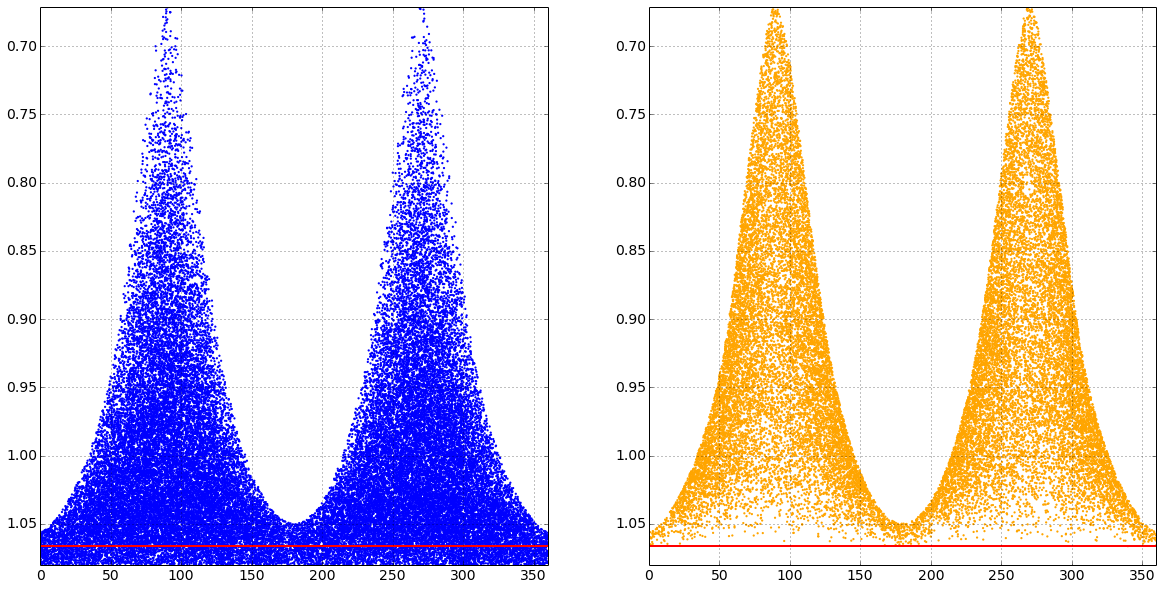

In [7]:
q_split = 1.066
cutcol = ['w', 'q']
haz_gen_cut, nohaz_gen_cut = ld.cut_params(haz_gen, nohaz_gen, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_params(haz_gen, nohaz_gen, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_2params(cutcol, [haz_gen_sg1b, nohaz_gen_sg1b])
p1, p2 = [[0.0, q_split], [360.0, q_split]]
vd.linearcut_plot(p1, p2, haz_gen_cut, nohaz_gen_cut, invertaxes=[0,1])

In [8]:
haz_gen_sg1, haz_gen_sg1__ = ld.split_by_colval(haz_gen, 'q', q_split)
nohaz_gen_sg1, nohaz_gen_sg1__ = ld.split_by_colval(nohaz_gen, 'q', q_split)

In [9]:
haz_genu_sg1, haz_genu_sg1__ = ld.split_by_colval(haz_genu, 'q', q_split)
nohaz_genu_sg1, nohaz_genu_sg1__ = ld.split_by_colval(nohaz_genu, 'q', q_split)

## Extract Atiras and Atens

In [10]:
haz_gen_atiras, haz_gen_atiras_num = rdb.get_atiras(haz_gen)
nohaz_gen_atiras, nohaz_gen_atiras_num = rdb.get_atiras(nohaz_gen)

In [11]:
haz_gen_atens, naz_gen_atens_num = rdb.get_atens(haz_gen)
nohaz_gen_atens, nohaz_gen_atens_num = rdb.get_atens(nohaz_gen)

In [12]:
haz_gen_atiras_atens = pd.concat((haz_gen_atiras, haz_gen_atens))
nohaz_gen_atiras_atens = pd.concat((nohaz_gen_atiras, nohaz_gen_atens))
haz_gen_atiras_atens_num = len(haz_gen_atiras_atens)
nohaz_gen_atiras_atens_num = len(nohaz_gen_atiras_atens)

In [13]:
# print haz_gen_atiras_atens_num, nohaz_gen_atiras_atens_num

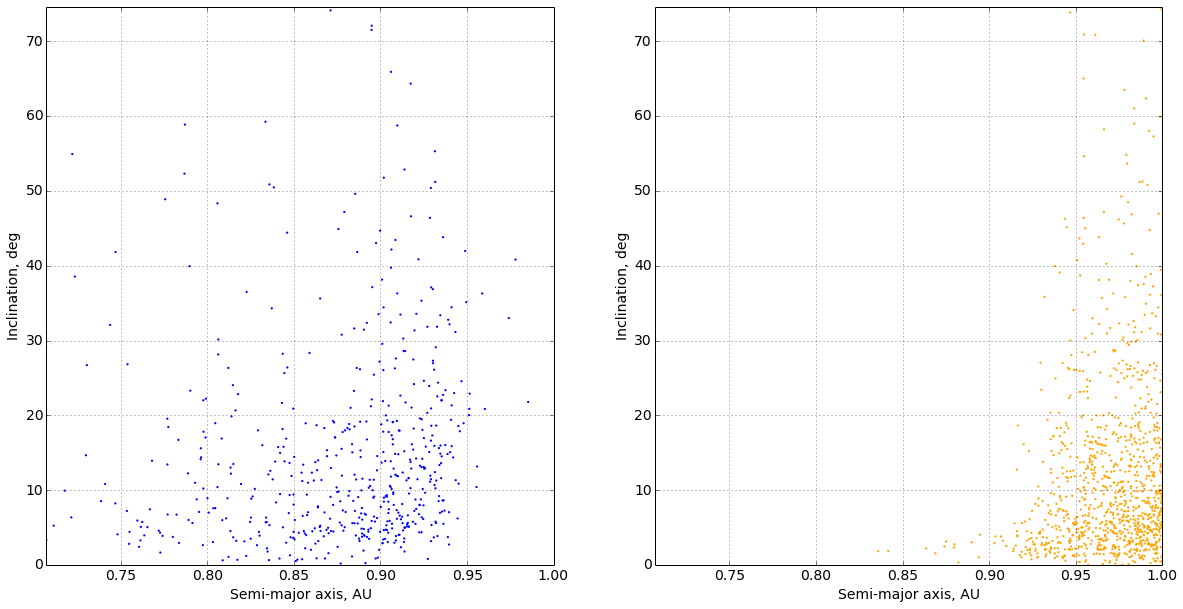

In [14]:
cutcol = ['a', 'i']
labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [haz_gen_atiras_atens, nohaz_gen_atiras_atens])

In [15]:
# cutcol = ['a', 'q']
# labels = [vd.colnames[nm] for nm in cutcol]
# vd.display_param2d(cutcol, labels, [atiras_haz, atiras_nohaz])

In [16]:
# cutcol = ['a', 'q']
# labels = [vd.colnames[nm] for nm in cutcol]
# vd.display_param2d(cutcol, labels, [atens_haz, atens_nohaz])

In [17]:
# vd.display_allparams([atens_haz, atens_nohaz], vd.combs, vd.colnames)

In [18]:
# vd.display_allparams([atiras_atens_haz, atiras_atens_nohaz], vd.combs, vd.colnames)

In [19]:
reload(al)
clf_aa = svm.LinearSVC()
splitres = al.split_by_clf(clf_aa, cutcol, haz_gen_atiras_atens, 
                                           nohaz_gen_atiras_atens)
haz_sg1aa, nohaz_sg1aa = splitres[0]
haz_sg1aa__, nohaz_sg1aa__ = splitres[1]
sg1aa_sc = splitres[2]

purity of PHA region: 0.923357664234
number of PHAs in the PHA region: 1012
number of NHAs in the PHA region: 84

purity of NHA region: 0.919765166341
number of PHAs in the NHA region: 41
number of NHAs in the NHA region: 470

fraction of correctly classified PHAs: 0.96106362773


In [20]:
# vd.display_param2d(cutcol, labels, [haz_sg1aa, nohaz_sg1aa])

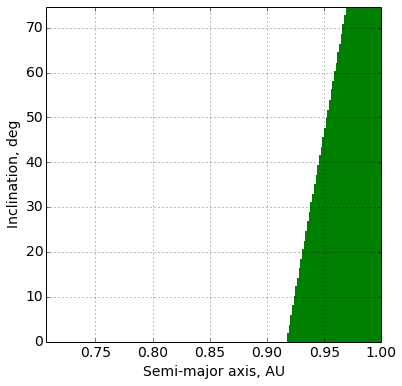

In [21]:
plotgrid = np.array([[0.0, 0.0], [1.0, 1.0]])
vd.plot_classifier(plotgrid, clf_aa, num=200, figsize=(6,6), scales=sg1aa_sc, 
                   labels=labels, cmap='ocean_r')

In [24]:
haz_extracted.append(haz_sg1aa)
nohaz_trapped.append(nohaz_sg1aa)

## Extract Apollos

In [25]:
haz_gen_apollo, haz_ap_num = rdb.get_apollos(haz_gen_sg1)
nohaz_gen_apollo, nohaz_ap_num = rdb.get_apollos(nohaz_gen_sg1)

In [26]:
# vd.display_allparams([apollos_haz, apollos_nohaz], vd.combs, vd.colnames)

### Split apollos by q-i plane

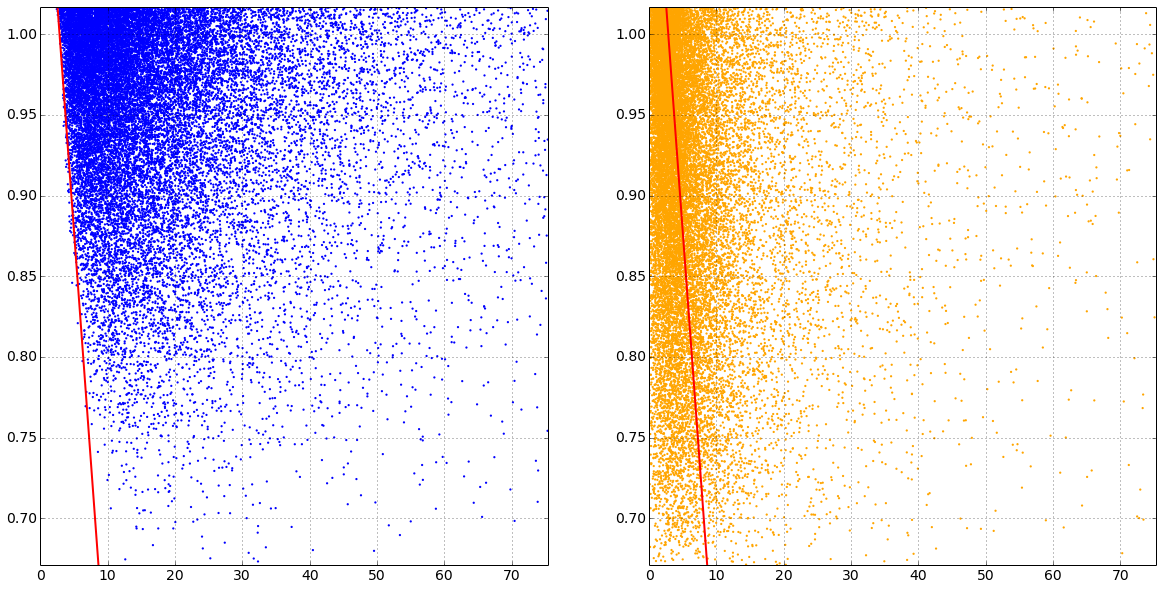

In [27]:
cutcol = ['i', 'q']
haz_cut, nohaz_cut = ld.cut_params(haz_gen_apollo, nohaz_gen_apollo, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_params(haz_gen, nohaz_gen, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_2params(cutcol, [haz_gen_sg1b, nohaz_gen_sg1b])
p1, p2 = [[2.5, 1.02], [9.0, 0.65]]
vd.linearcut_plot(p1, p2, haz_cut, nohaz_cut)

In [28]:
reload(ld)
apollo_qi, apollo_qi__ = ld.split_by_line(haz_gen_apollo, nohaz_gen_apollo, [p1, p2], cutcol)
haz_gen_apollo_qi, nohaz_gen_apollo_qi = apollo_qi
haz_gen_apollo_qi__, nohaz_gen_apollo_qi__ = apollo_qi__

PHA purity of the left subset: 0.994832797114
PHA purity of the right subset: 0.339817032697


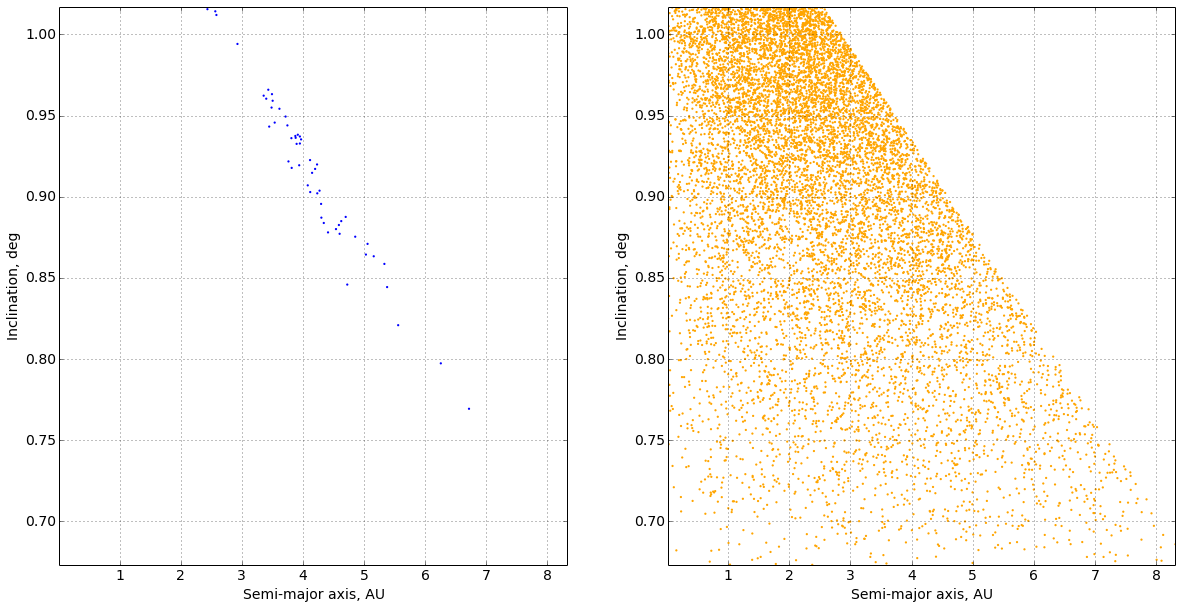

In [29]:
vd.display_param2d(cutcol, labels, [haz_gen_apollo_qi, nohaz_gen_apollo_qi])

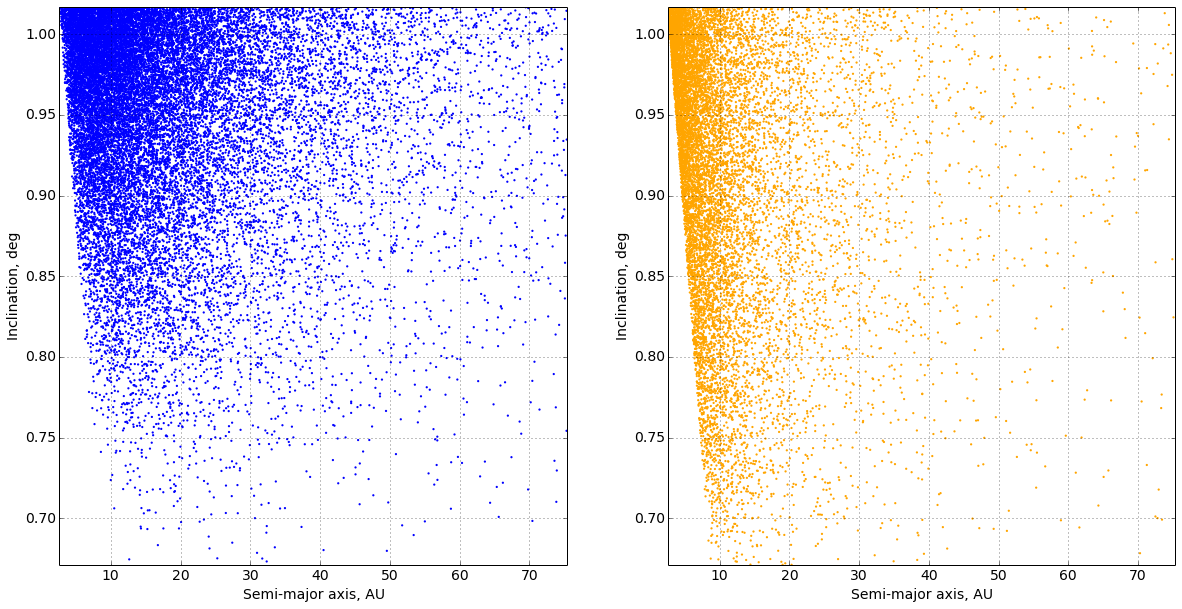

In [30]:
vd.display_param2d(cutcol, labels, [haz_gen_apollo_qi__, nohaz_gen_apollo_qi__])

In [31]:
haz_extracted.append(haz_gen_apollo_qi)
nohaz_trapped.append(nohaz_gen_apollo_qi)

### Split right subset of apollos by q-a plane

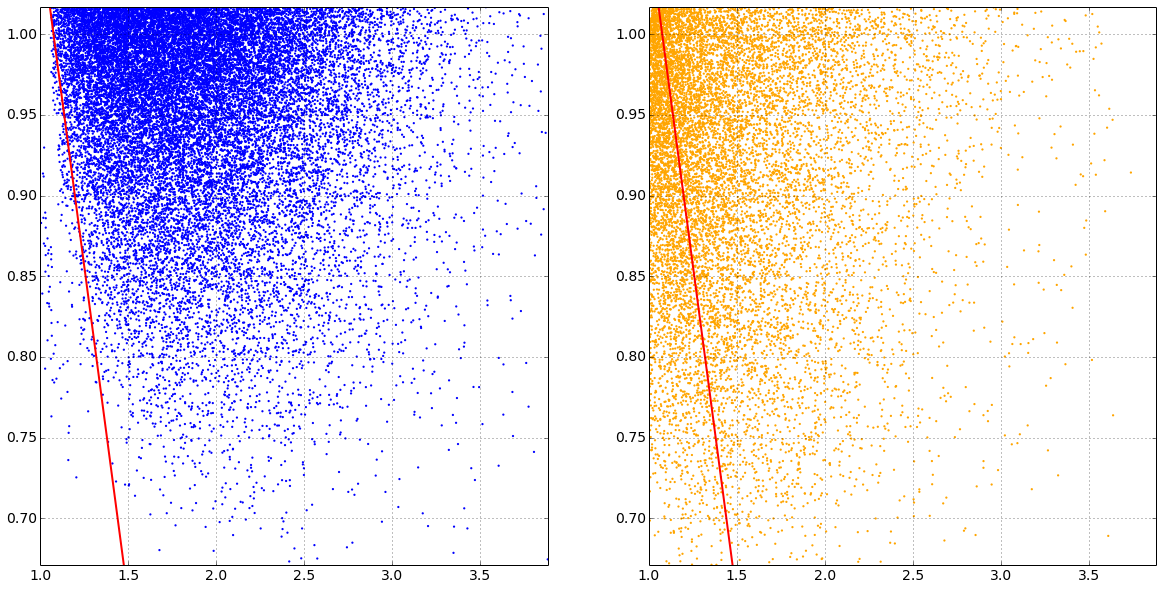

In [32]:
cutcol = ['a', 'q']
haz_cut, nohaz_cut = ld.cut_params(haz_gen_apollo_qi__, nohaz_gen_apollo_qi__, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_params(haz_gen, nohaz_gen, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_2params(cutcol, [haz_gen_sg1b, nohaz_gen_sg1b])
p1, p2 = [[1.05, 1.02], [1.5, 0.65]]
vd.linearcut_plot(p1, p2, haz_cut, nohaz_cut)

In [33]:
reload(ld)
splitres = ld.split_by_line(haz_gen_apollo_qi__, nohaz_gen_apollo_qi__, 
                                          [p1, p2], cutcol)

haz_gen_apollo_qa, nohaz_gen_apollo_qa = splitres[0]
haz_gen_apollo_qa__, nohaz_gen_apollo_qa__ = splitres[1]

PHA purity of the left subset: 0.929450615431
PHA purity of the right subset: 0.277107279693


In [34]:
haz_extracted.append(haz_gen_apollo_qa)
nohaz_trapped.append(nohaz_gen_apollo_qa)

### Deep analysis of the rest of Apollos

In [35]:
# vd.display_allparams([haz_gen_apollo_qa__, nohaz_gen_apollo_qa__], vd.combs, vd.colnames)

** Amplify distribution by the symmetric copies of the dataset **

In [36]:
haz_gen_apollo_qa__se = ld.add_doublemirror_column(haz_gen_apollo_qa__, 'w', 180.0)
nohaz_gen_apollo_qa__se = ld.add_doublemirror_column(nohaz_gen_apollo_qa__, 'w', 180.0)

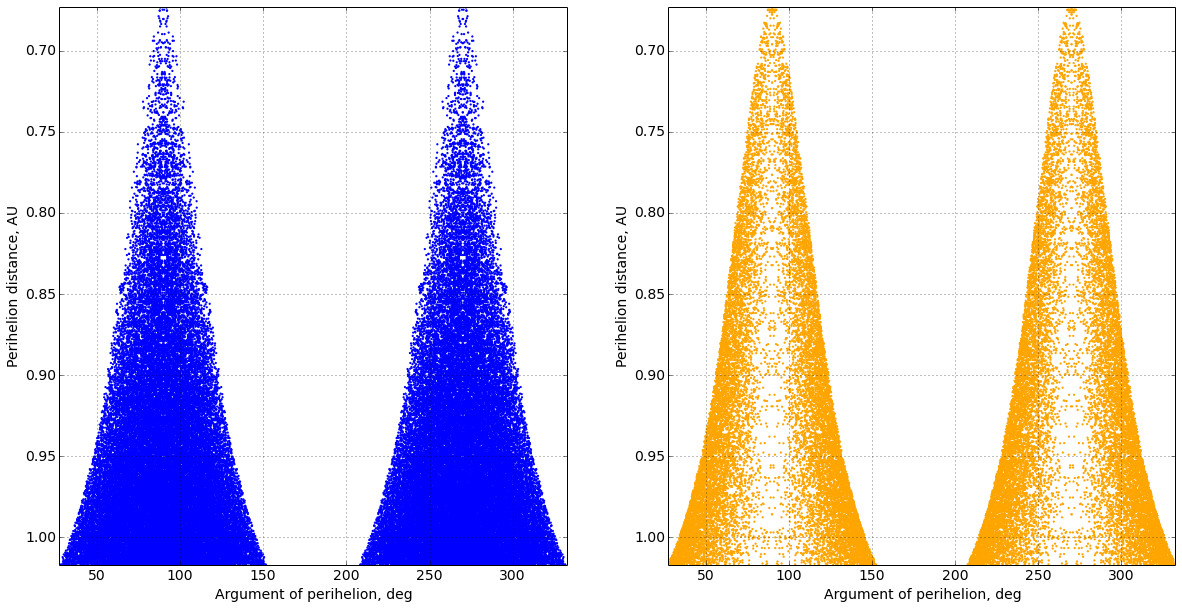

In [37]:
cutcol = ['w', 'q']
labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [haz_gen_apollo_qa__se, nohaz_gen_apollo_qa__se],
                   invertaxes=[0,1])

### a) Extract boundary layers from the right subset of apollos

In [38]:
reload(al)
clf_apollo_wq = svm.SVC(gamma=5., C=100.0, class_weight={1: 3.0}) # 2.8
splitres = al.split_by_clf(clf_apollo_wq, cutcol, haz_gen_apollo_qa__se, 
                                                  nohaz_gen_apollo_qa__se,
                                                  haz_gen_apollo_qa__, 
                                                  nohaz_gen_apollo_qa__)

haz_gen_apollo_wq, nohaz_gen_apollo_wq = splitres[0]
haz_gen_apollo_wq__, nohaz_gen_apollo_wq__ = splitres[1]
apollo_wq_sc = splitres[2]

purity of PHA region: 0.527179722095
number of PHAs in the PHA region: 6905
number of NHAs in the PHA region: 6193

purity of NHA region: 0.902645154209
number of PHAs in the NHA region: 1774
number of NHAs in the NHA region: 16448

fraction of correctly classified PHAs: 0.795598571264


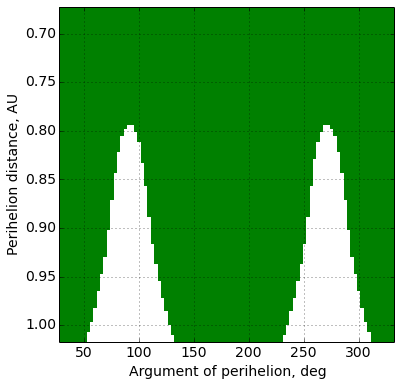

In [39]:
reload(vd)
plotgrid = np.array([[0.0, 0.0], [1.0, 1.0]])
vd.plot_classifier(plotgrid, clf_apollo_wq, num=100, figsize=(6,6), scales=apollo_wq_sc, 
                   labels=labels, cmap='ocean_r', invertaxes=[0,1])

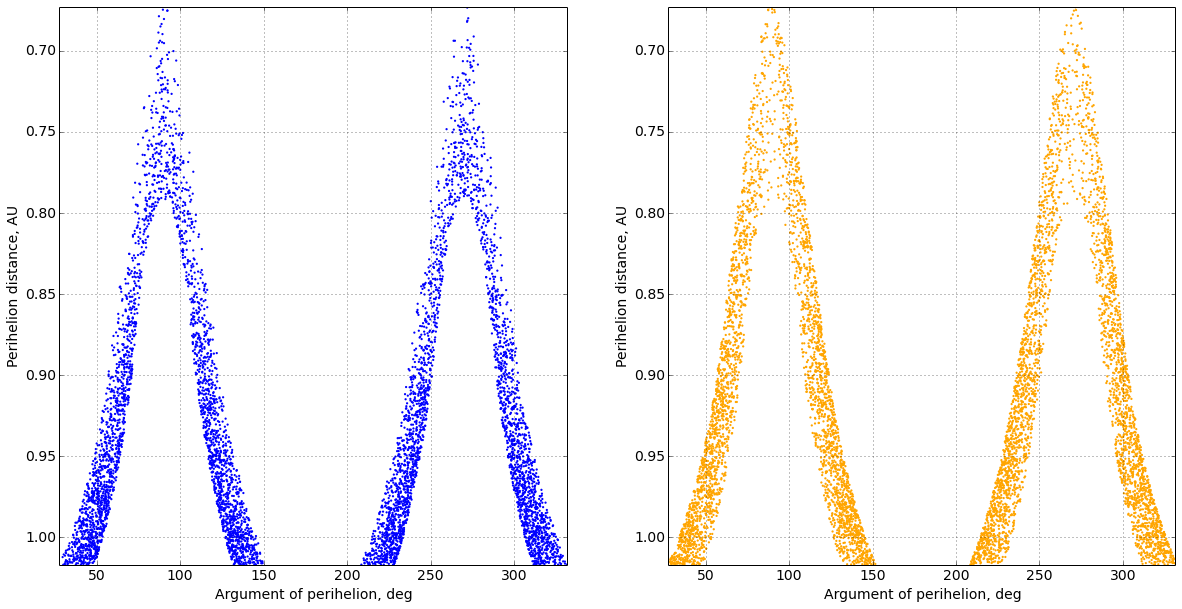

In [40]:
# cutcol = ['w', 'q']
# labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [haz_gen_apollo_wq, nohaz_gen_apollo_wq], invertaxes=[0,1])

#### Split boundary layer of the apollo subset by a-i surface

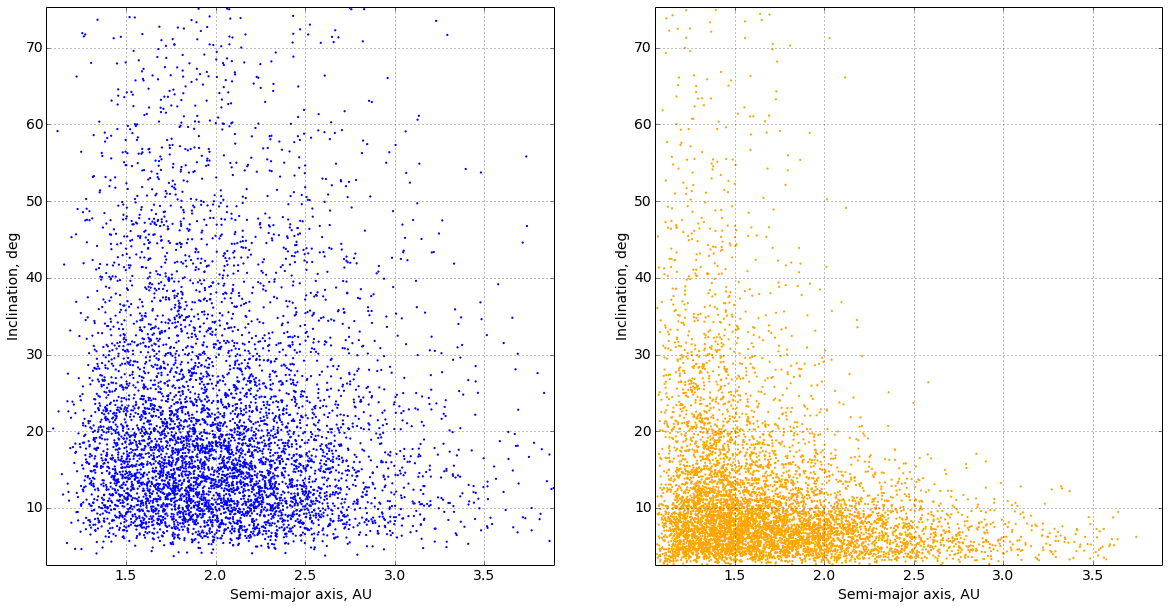

In [41]:
cutcol = ['a', 'i']
labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [haz_gen_apollo_wq, nohaz_gen_apollo_wq]) #invertaxes=[0,1]

In [42]:
reload(al)
clf_apollo_ai = svm.SVC(gamma=0.67, C=10000.0, class_weight={0: 2.5})
# clf = svm.SVC(gamma=67.0, C=100.0, class_weight={0: 2.5})
splitres = al.split_by_clf(clf_apollo_ai, cutcol, haz_gen_apollo_wq, nohaz_gen_apollo_wq)

haz_gen_apollo_ai, nohaz_gen_apollo_ai = splitres[0]
haz_gen_apollo_ai__, nohaz_gen_apollo_ai__ = splitres[1]
apollo_ai_sc = splitres[2]

purity of PHA region: 0.897285559175
number of PHAs in the PHA region: 4132
number of NHAs in the PHA region: 473

purity of NHA region: 0.673495820087
number of PHAs in the NHA region: 2773
number of NHAs in the NHA region: 5720

fraction of correctly classified PHAs: 0.598406951484


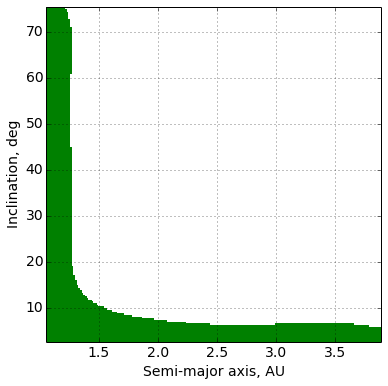

In [43]:
vd.plot_classifier(plotgrid, clf_apollo_ai, num=200, figsize=(6,6), 
                   scales=apollo_ai_sc, labels=labels, cmap='ocean_r')

In [44]:
# haz_extracted.append(haz_gen_apollo_ai)
# nohaz_trapped.append(nohaz_gen_apollo_ai)

In [45]:
# vd.display_allparams([haz_gen_sg1b_ee, nohaz_gen_sg1b_ee], vd.combs, vd.colnames)

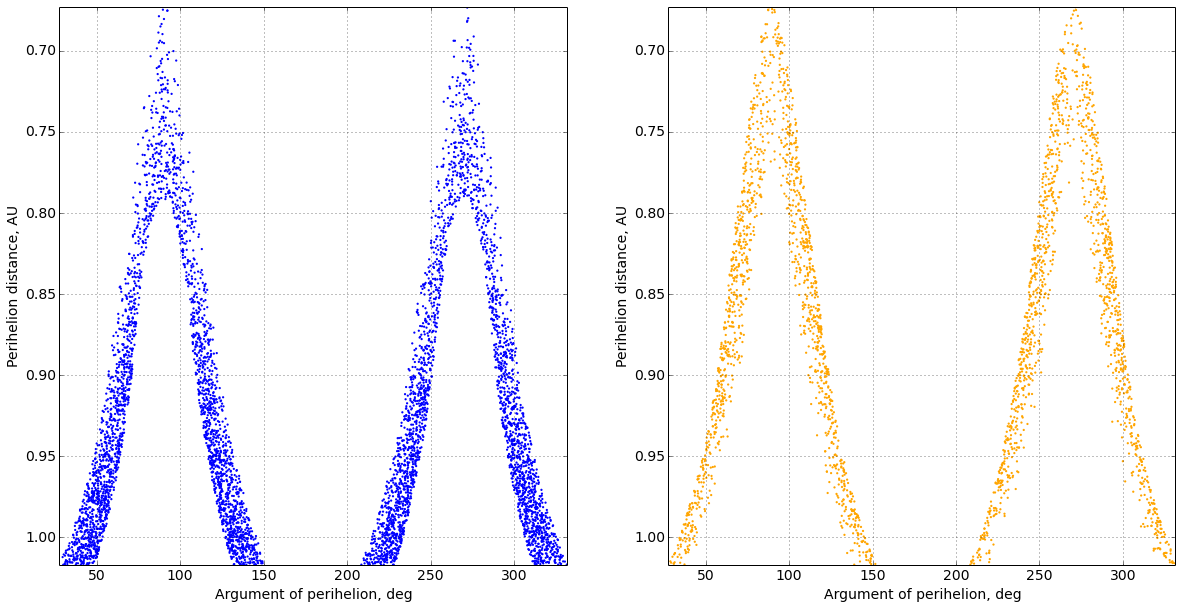

In [46]:
cutcol = ['w', 'q']
labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [haz_gen_apollo_ai__, nohaz_gen_apollo_ai__],
                   invertaxes=[0,1]) #invertaxes=[0,1]

#### Extract PHA volume from the rest of a-i split

In [47]:
# vd.display_allparams([haz_gen_apollo_ai__, nohaz_gen_apollo_ai__], vd.combs, vd.colnames)

In [48]:
print len(haz_gen_apollo_ai__)
print len(nohaz_gen_apollo_ai__)

2773
5720


In [49]:
haz_gen_apollo_ai__se = ld.add_doublemirror_column(haz_gen_apollo_ai__, 'w', 180.0)
nohaz_gen_apollo_ai__se = ld.add_doublemirror_column(nohaz_gen_apollo_ai__, 'w', 180.0)

In [50]:
cutcol = ['w', 'q', 'i'] # a
# clf_apollo_wqi = svm.SVC(gamma=50.0, C=1.0, class_weight={0: 1.5})
clf_apollo_wqi = svm.SVC(gamma=50.0, C=0.3, class_weight={0: 1.5})
# clf = svm.SVC(gamma=30.0, C=0.8, class_weight={0: 1.5})
splitres = al.split_by_clf(clf_apollo_wqi, cutcol, haz_gen_apollo_ai__se,
                                                   nohaz_gen_apollo_ai__se,
                                                   haz_gen_apollo_ai__,
                                                   nohaz_gen_apollo_ai__)

haz_gen_apollo_wqi, nohaz_gen_apollo_wqi = splitres[0]
haz_gen_apollo_wqi__, nohaz_gen_apollo_wqi__ = splitres[1]
apollo_wqi_sc = splitres[2]

purity of PHA region: 0.871232876712
number of PHAs in the PHA region: 1272
number of NHAs in the PHA region: 188

purity of NHA region: 0.786577562918
number of PHAs in the NHA region: 1501
number of NHAs in the NHA region: 5532

fraction of correctly classified PHAs: 0.458708979445


In [51]:
# cutcol = ['w', 'q']
# clfx = svm.SVC(gamma=50.0, C=1.0, class_weight={1: 10})
# clfx = al.sgmask_clf(haz_gen_apollo_ai__se, nohaz_gen_apollo_ai__se, 
#                      haz_genu_rest, nohaz_genu_rest, clfx, ['w', 'q'])

cutcol = ['w', 'q']
labels = [vd.colnames[nm] for nm in cutcol]

clfmask = svm.SVC(gamma=50.0, C=100.0, class_weight={1: 10})
clfmask = al.sgmask_clf(haz_gen_apollo_qa__se, nohaz_gen_apollo_qa__se, 
                        haz_genu_rest, nohaz_genu_rest, clfmask, cutcol)

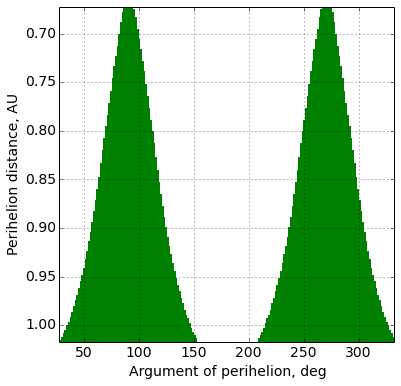

In [52]:
vd.plot_classifier(plotgrid, clfmask, num=200, figsize=(6,6), labels=labels, 
                   cmap='ocean_r', scales=apollo_wqi_sc, invertaxes=[0,1])

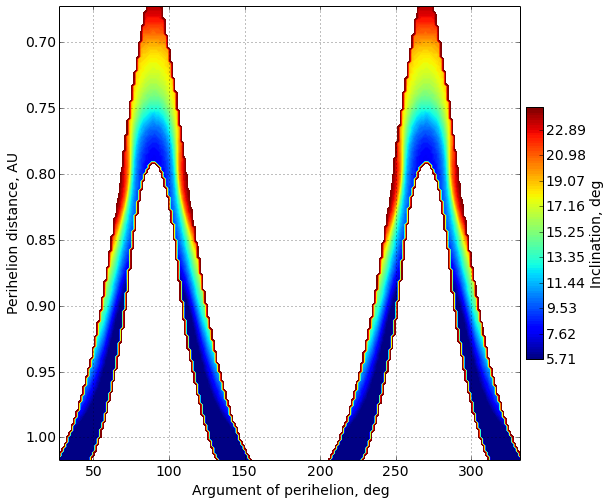

In [115]:
# %matplotlib auto
# %matplotlib inline
reload(vd)
cutcol = ['w', 'q', 'i']
labels = [vd.colnames[nm] for nm in cutcol]
clf_masks = [(clfmask, 0), (clf_apollo_wq, 0)]
vd.plot_clf3d(clf_apollo_wqi, num=200, labels=labels, figsize=(8,7), mode='2d', 
              scales=apollo_wqi_sc, clf_masks=clf_masks, invertaxes=[0,1])

In [ ]:
# haz_extracted.append(haz_gen_apollo_wqi)
# nohaz_trapped.append(nohaz_gen_apollo_wqi)

Extract PHA volume from the rest of the q-w split

In [60]:
# print len(haz_gen_apollo_wq__)
# print len(nohaz_gen_apollo_wq__)

In [61]:
# haz_gen_apollo_wq__si = haz_gen_apollo_wq__[haz_gen_apollo_wq__['i'] < 10]
# nohaz_gen_apollo_wq__si = nohaz_gen_apollo_wq__[nohaz_gen_apollo_wq__['i'] < 10]

In [62]:
# haz_gen_apollo_wq__si = pd.concat((haz_gen_apollo_wq__si, haz_gen_apollo_ai__))
# nohaz_gen_apollo_wq__si = pd.concat((nohaz_gen_apollo_wq__si, nohaz_gen_apollo_ai__))

In [63]:
# haz_gen_apollo_wq__se = ld.add_doublemirror_column(haz_gen_apollo_wq__si, 'w', 180.0)
# nohaz_gen_apollo_wq__se = ld.add_doublemirror_column(nohaz_gen_apollo_wq__si, 'w', 180.0)

In [119]:
# cutcol = ['w', 'q', 'i']
# clf = svm.SVC(gamma=30.0, C=1.0, class_weight={0: 1.5}) #class_weight={0: 1.5}
# apollo_wq_wqi, apollo_wq_wqi__, scales = al.split_by_clf(clf, cutcol, haz_gen_apollo_wq__se,
#                                                      nohaz_gen_apollo_wq__se,
#                                                      haz_gen_apollo_wq__si,
#                                                      nohaz_gen_apollo_wq__si)
# haz_gen_apollo_wq_wqi, nohaz_gen_apollo_wq_wqi = apollo_wq_wqi
# haz_gen_apollo_wq_wqi__, nohaz_gen_apollo_wq_wqi__ = apollo_wq_wqi__

In [65]:
# print len(haz_gen_apollo_wq_wqi)
# print len(nohaz_gen_apollo_wq_wqi)
# print
# print len(haz_gen_apollo_wq_wqi__)
# print len(nohaz_gen_apollo_wq_wqi__)

# print float(len(haz_gen_apollo_wq_wqi))/len(haz_gen_apollo_wq__si)

In [66]:
# vd.plot_clf3d(clf, num=80, labels=labels, figsize=(8,7), mode='2d', scales=scales)

In [ ]:
# haz_gen_apollo_qa__se

### b) Alternative split sequence for Apollos
#### Split by w-q-i surface

In [55]:
reload(al)
cutcol = ['w', 'q', 'i']

clf_apollo_wqi2 = svm.SVC(gamma=30.0, C=0.3, class_weight={0: 1.5}) #class_weight={0: 1.5} 
#(20 0.5), (30 0.1)
splitres = al.split_by_clf(clf_apollo_wqi2, cutcol,  haz_gen_apollo_qa__se,
                                                     nohaz_gen_apollo_qa__se,
                                                     haz_gen_apollo_qa__,
                                                     nohaz_gen_apollo_qa__)

haz_gen_apollo_wqi2, nohaz_gen_apollo_wqi2 = splitres[0]
haz_gen_apollo_wqi2__, nohaz_gen_apollo_wqi2__ = splitres[1]
apollo_wqi2_sc = splitres[2]

purity of PHA region: 0.899007189319
number of PHAs in the PHA region: 5252
number of NHAs in the PHA region: 590

purity of NHA region: 0.865491796844
number of PHAs in the NHA region: 3427
number of NHAs in the NHA region: 22051

fraction of correctly classified PHAs: 0.60513884088


** Prepare mask to exclude points from the plot that do not blong to the domain  **

In [56]:
cutcol = ['w', 'q']
labels = [vd.colnames[nm] for nm in cutcol]

clfmask = svm.SVC(gamma=50.0, C=100.0, class_weight={1: 10})
clfmask = al.sgmask_clf(haz_gen_apollo_qa__se, nohaz_gen_apollo_qa__se, 
                     haz_genu_rest, nohaz_genu_rest, clfmask, cutcol)

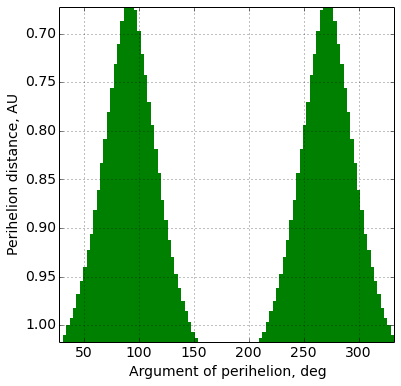

In [57]:
vd.plot_classifier(plotgrid, clfmask, num=100, figsize=(6,6), scales=apollo_wqi2_sc, 
                   labels = labels, cmap='ocean_r', invertaxes=[0, 1])

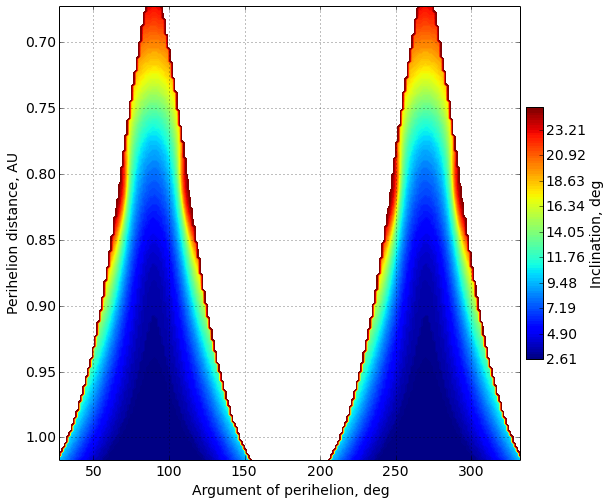

In [58]:
# reload(vd)
reload(ld)
clf_masks = [(clfmask, 0)]
cutcol = ['w', 'q', 'i']
labels = [vd.colnames[nm] for nm in cutcol]
vd.plot_clf3d(clf_apollo_wqi2, num=200, labels=labels, figsize=(8,7), mode='2d', 
              scales=apollo_wqi2_sc, clf_masks=clf_masks, invertaxes=[0, 1]) 
# clf_masks=clf_masks

In [59]:
haz_extracted.append(haz_gen_apollo_wqi2)
nohaz_trapped.append(nohaz_gen_apollo_wqi2)

In [60]:
# cutcol = ['w', 'q']
# labels = [vd.colnames[nm] for nm in cutcol]
# vd.display_param2d(cutcol, labels, [haz_genu_rest, nohaz_genu_rest])

In [61]:
# vd.display_param2d(cutcol, labels, [haz_gen_apollo_qa__se, nohaz_gen_apollo_qa__se])

In [62]:
# vd.display_param2d(cutcol, labels, [haz_genu_sg1, nohaz_genu_sg1])

#### Split rest by the w-q-a surface

In [63]:
# vd.display_allparams([haz_gen_apollo_qa_wqi__, nohaz_gen_apollo_qa_wqi__], 
#                       vd.combs, vd.colnames)

In [64]:
haz_gen_apollo_wqi2__se = ld.add_doublemirror_column(haz_gen_apollo_wqi2__, 'w', 180.0)
nohaz_gen_apollo_wqi2__se = ld.add_doublemirror_column(nohaz_gen_apollo_wqi2__, 'w', 180.0)

In [65]:
reload(al)
cutcol = ['w', 'q', 'a']
clf_apollo_wqa2 = svm.SVC(gamma=20.0, C=0.5, class_weight={0: 1.5}) #class_weight={0: 1.5}
# (30 0.5)
splitres = al.split_by_clf(clf_apollo_wqa2, cutcol,  haz_gen_apollo_wqi2__se,
                                                     nohaz_gen_apollo_wqi2__se,
                                                     haz_gen_apollo_wqi2__,
                                                     nohaz_gen_apollo_wqi2__)

haz_gen_apollo_wqa2, nohaz_gen_apollo_wqa2 = splitres[0]
haz_gen_apollo_wqa2__, nohaz_gen_apollo_wqa2__ = splitres[1]
apollo_wqi2_sc = splitres[2]

purity of PHA region: 0.9
number of PHAs in the PHA region: 1260
number of NHAs in the PHA region: 140

purity of NHA region: 0.910000830634
number of PHAs in the NHA region: 2167
number of NHAs in the NHA region: 21911

fraction of correctly classified PHAs: 0.367668514736


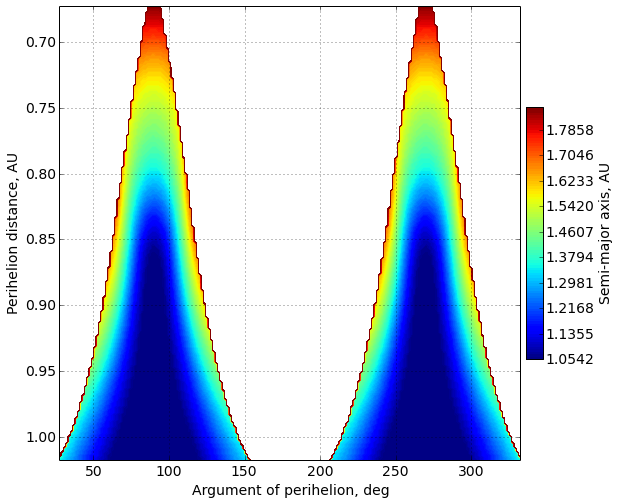

In [66]:
clf_masks = [(clfmask, 0)]
cutcol = ['w', 'q', 'a']
labels = [vd.colnames[nm] for nm in cutcol]
vd.plot_clf3d(clf_apollo_wqa2, num=200, labels=labels, figsize=(8,7), mode='2d', 
              scales=apollo_wqi2_sc, clf_masks=clf_masks, invertaxes=[0, 1])

In [67]:
haz_extracted.append(haz_gen_apollo_wqa2)
nohaz_trapped.append(nohaz_gen_apollo_wqa2)

In [74]:
# vd.display_allparams([haz_gen_apollo_wqa2__, nohaz_gen_apollo_wqa2__], vd.combs, vd.colnames)

## Extract Amors

In [68]:
haz_gen_amor, haz_am_num = rdb.get_amors(haz_gen_sg1)
nohaz_gen_amor, nohaz_am_num = rdb.get_amors(nohaz_gen_sg1)

In [69]:
# vd.display_allparams([haz_gen_amor, nohaz_gen_amor], vd.combs, vd.colnames)

### Cut off nonhazardous 'clouds' by w-i

In [70]:
haz_gen_amor_se = ld.add_doublemirror_column(haz_gen_amor, 'w', 180.0)
nohaz_gen_amor_se = ld.add_doublemirror_column(nohaz_gen_amor, 'w', 180.0)

In [71]:
reload(ld)
ef = 0.25
haz_gen_amor_see = ld.extend_by_copies(haz_gen_amor_se, 'w', extend_factor=ef)
nohaz_gen_amor_see = ld.extend_by_copies(nohaz_gen_amor_se, 'w', extend_factor=ef)

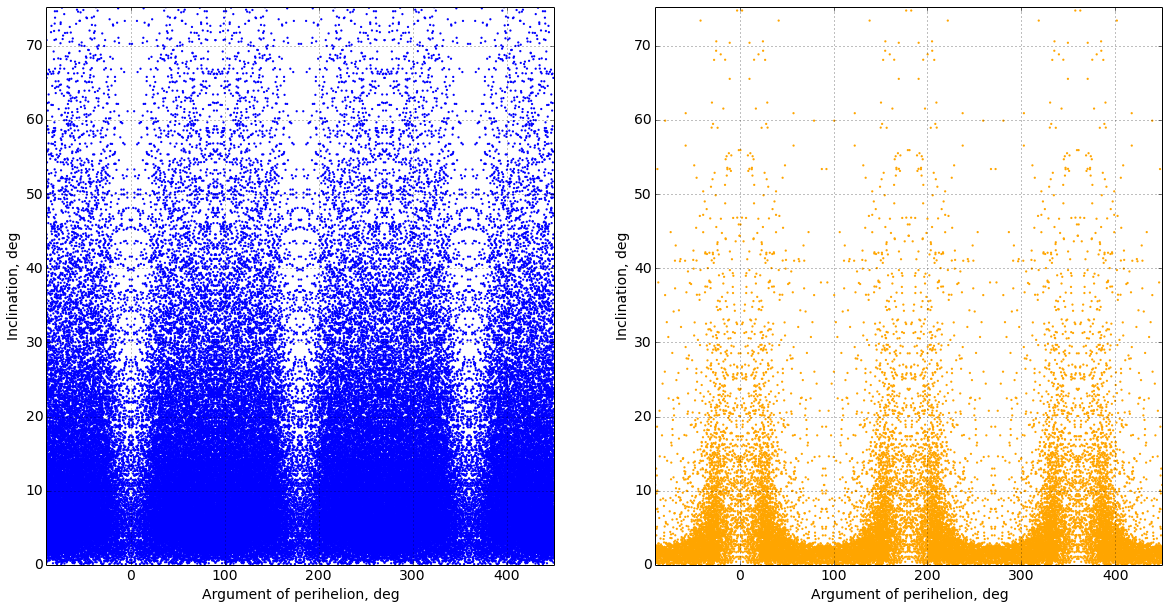

In [72]:
cutcol = ['w', 'i']
labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [haz_gen_amor_see, nohaz_gen_amor_see])

In [73]:
reload(al)
clf_amor_wi = svm.SVC(gamma=30., C=0.1, class_weight={1: 5.5})
# clf = svm.SVC(gamma=12., C=0.02, class_weight={1: 5.5})
# clf = svm.SVC(gamma=10., C=0.08, class_weight={1: 5.5})
splitres = al.split_by_clf(clf_amor_wi, cutcol, haz_gen_amor_see, 
                                                nohaz_gen_amor_see, 
                                                haz_gen_amor, 
                                                nohaz_gen_amor)

haz_gen_amor_wi, nohaz_gen_amor_wi = splitres[0]
haz_gen_amor_wi__, nohaz_gen_amor_wi__ = splitres[1]
amor_wi_sc = splitres[2]

purity of PHA region: 0.360562232634
number of PHAs in the PHA region: 3540
number of NHAs in the PHA region: 6278

purity of NHA region: 0.962918178154
number of PHAs in the NHA region: 552
number of NHAs in the NHA region: 14334

fraction of correctly classified PHAs: 0.865102639296


In [96]:
# plotgrid = np.array([[0.0, 0.0], [1.0, 1.0]])
scales = deepcopy(amor_wi_sc)
# scales[0] = (0.0, 360.0)
wmin, wmax = min(haz_gen_amor['w']), max(haz_gen_amor['w'])
scales[0] = (wmin, wmax)
cx = ef * wmax / (wmax * (1.0 + 2 * ef))
plt_bounds = np.array([[cx, 0.0], [1-cx, 1.0]])

In [99]:
# print labels
# print scales
# print cutplotx
# print plt_bounds

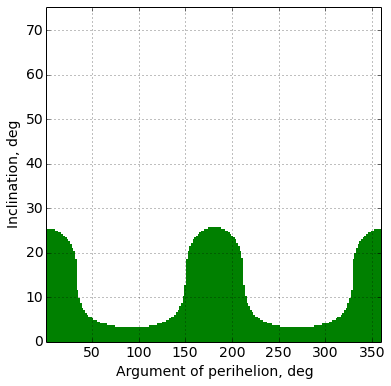

In [98]:
vd.plot_classifier(plt_bounds, clf_amor_wi, num=200, figsize=(6,6), scales=scales, 
                   labels=labels, cmap='ocean_r')
# vd.plot_classifier(plotgrid, clf_amor_wi, num=200, figsize=(6,6), scales=amor_wi_sc, 
#                    labels=labels, cmap='ocean_r')

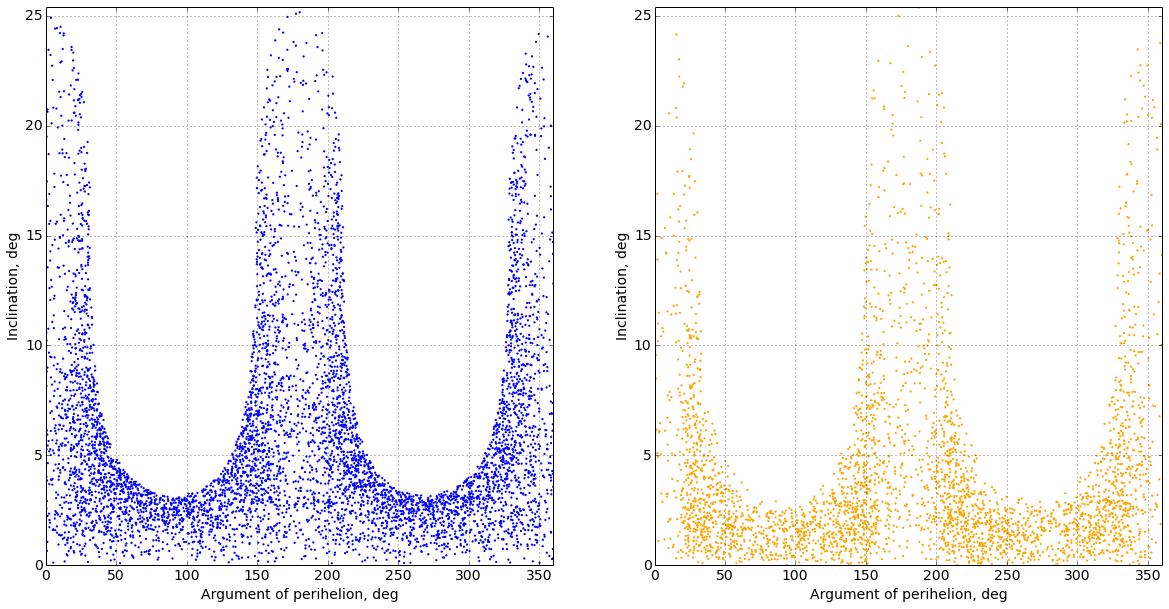

In [100]:
vd.display_param2d(cutcol, labels, [haz_gen_amor_wi, nohaz_gen_amor_wi])

In [ ]:
# vd.display_allparams([haz_gen_sg1g, nohaz_gen_sg1g], vd.combs, vd.colnames)

## Extract PHA belt by 3 parameters

In [101]:
haz_gen_amor_wi_se = ld.add_mirror_column(haz_gen_amor_wi, 'w', 180.0)
nohaz_gen_amor_wi_se = ld.add_mirror_column(nohaz_gen_amor_wi, 'w', 180.0)

In [102]:
# ef = 0.25
# haz_gen_amor_wi_see = ld.extend_by_copies(haz_gen_amor_wi_se , 'w', extend_factor=ef)
# nohaz_gen_amor_wi_see = ld.extend_by_copies(nohaz_gen_amor_wi_se , 'w', extend_factor=ef)

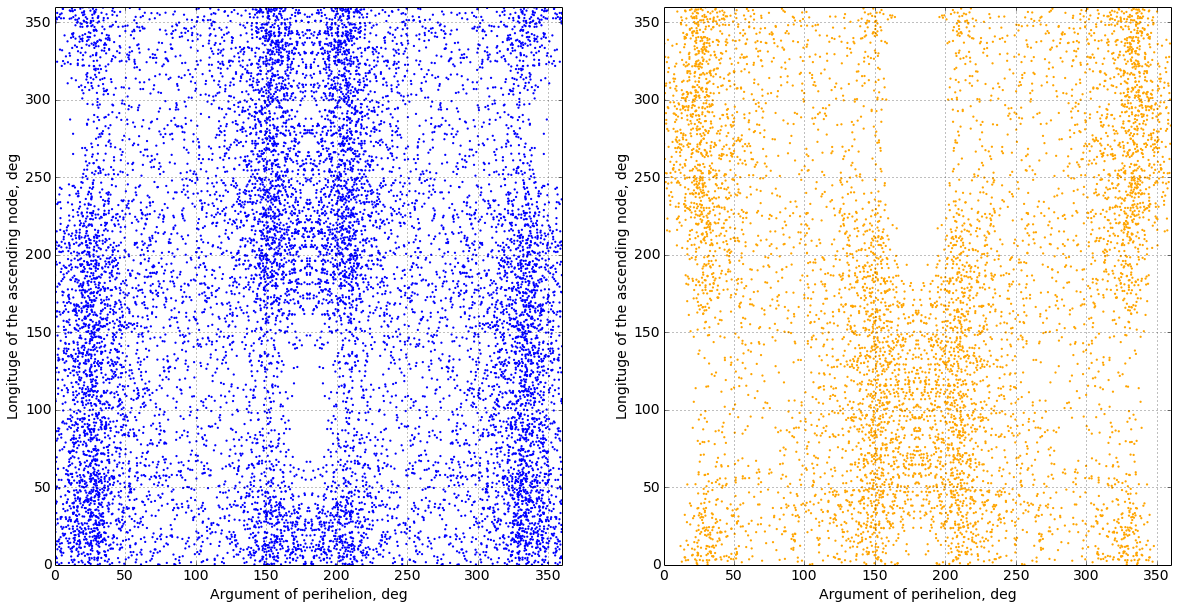

In [103]:
cutcol = ['w', 'om']
labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [haz_gen_amor_wi_se, nohaz_gen_amor_wi_se])

In [104]:
cutcol = ['w', 'om', 'q']
# clf = svm.SVC(gamma=10.0, C=1000, class_weight={0: 2.0})
clf_amor_womq = svm.SVC(gamma=20.0, C=8.0, class_weight={0: 2.4})
splitres = al.split_by_clf(clf_amor_womq, cutcol, haz_gen_amor_wi_se, 
                                                  nohaz_gen_amor_wi_se,
                                                  haz_gen_amor_wi, 
                                                  nohaz_gen_amor_wi)

haz_gen_amor_wqom, nohaz_gen_amor_wqom = splitres[0]
haz_gen_amor_wqom__, nohaz_gen_amor_wqom__ = splitres[1]
amor_wqom_sc = splitres[2]

purity of PHA region: 0.882234524409
number of PHAs in the PHA region: 1753
number of NHAs in the PHA region: 234

purity of NHA region: 0.771804367258
number of PHAs in the NHA region: 1787
number of NHAs in the NHA region: 6044

fraction of correctly classified PHAs: 0.495197740113


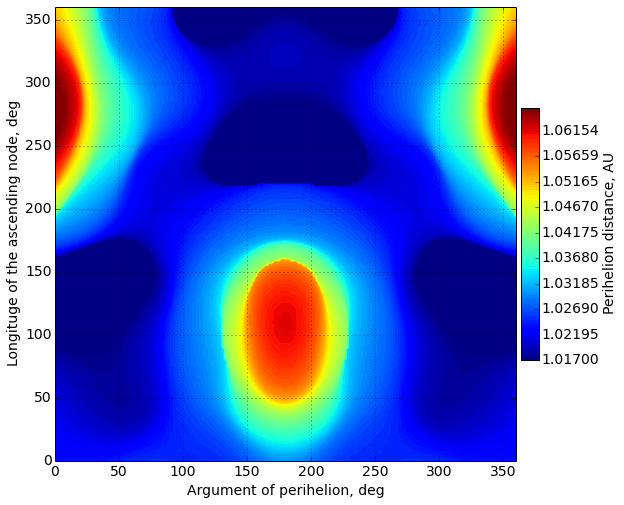

In [105]:
# reload(vd)
# %matplotlib auto
# %matplotlib inline
# vd.plot_scatter_clf3d(clf, num=30)
# scales[0] = (0.0, 360.0)
# cutplotx = ef * 360.0 / (360.0 * (1.0 + 2 * ef))
# plt_bounds = [[ef, 1-ef], [0.0, 1.0], [0.0, 1.0]]
cutcol = ['w', 'om', 'q']
labels = [vd.colnames[nm] for nm in cutcol]
vd.plot_clf3d(clf_amor_womq, num=200, labels=labels, figsize=(8,7), mode='2d', 
              scales=amor_wqom_sc) 
# plotbounds=plt_bounds

In [106]:
haz_extracted.append(haz_gen_amor_wqom)
nohaz_trapped.append(nohaz_gen_amor_wqom)

## Count down split quality

In [107]:
# haz_correct_num = sum(map(len, [haz_sg1aa, haz_gen_apollo_qi, 
#                            haz_gen_apollo_qa, haz_gen_apollo_ai, 
#                            haz_gen_amor_wqom, haz_gen_apollo_wqi]))

# nohaz_incorrect_num = sum(map(len, [nohaz_sg1aa, nohaz_gen_apollo_qi, 
#                            nohaz_gen_apollo_qa, nohaz_gen_apollo_ai, 
#                            nohaz_gen_amor_wqom, nohaz_gen_apollo_wqi]))

In [108]:
haz_correct_num = sum(map(len, [haz_sg1aa, haz_gen_apollo_qi, 
                           haz_gen_apollo_qa, haz_gen_apollo_wqi2, 
                           haz_gen_apollo_wqa2,haz_gen_amor_wqom]))

nohaz_incorrect_num = sum(map(len, [nohaz_sg1aa, nohaz_gen_apollo_qi, 
                           nohaz_gen_apollo_qa, nohaz_gen_apollo_wqi2, 
                           nohaz_gen_apollo_wqa2, nohaz_gen_amor_wqom]))

In [110]:
print sum(map(len, haz_extracted))/float(len(haz_gen))
print sum(map(len, nohaz_trapped))/float(len(nohaz_gen))

0.832331797235
0.0268165395424


In [111]:
print haz_correct_num
print float(haz_correct_num)/len(haz_gen)

22577
0.832331797235


In [112]:
# print len(haz_gen)

In [113]:
print float(nohaz_incorrect_num)/len(nohaz_gen)

0.0268165395424


In [114]:
print float(haz_correct_num)/(nohaz_incorrect_num + haz_correct_num)

0.944130807511
